<a href="https://colab.research.google.com/github/sujayk96/Person-detection/blob/master/Person%20Detector%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation





1.   Run these commands

  *   git clone https://github.com/Tessellate-Imaging/
  * cd Monk_Object_Detection/1_gluoncv_finetune/installation



2.   Select the right requirements file and run
  * cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install



In [1]:

! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git


Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 9129 (delta 42), reused 43 (delta 19), pack-reused 9059
Receiving objects: 100% (9129/9129), 238.06 MiB | 40.07 MiB/s, done.
Resolving deltas: 100% (3738/3738), done.
Checking out files: 100% (7561/7561), done.


In [2]:

# For colab use the command below
! cd Monk_Object_Detection/1_gluoncv_finetune/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

# For Local systems and cloud select the right CUDA version
# !cd Monk_Object_Detection/1_gluoncv_finetune/installation && cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 827.8MB 21kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 819kB 5.4MB/s 


### Set up kaggle and download the Processed Dataset

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jayko2110","key":"140d000db96a64c421531bac9a9a166e"}'}

In [5]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


## Dataset Directory
<pre>
Parent_Directory (root) <br>
      |<br>
      |-----------images_train<br>
      |              |------------------img1.jpg<br>
      |              |------------------img2.jpg<br>
      |              |------------------.........<br>
      |-----------images_val<br>
      |              |------------------img1.jpg<br>
      |              |------------------img2.jpg<br>
      |              |------------------.........<br>
      |-----------annotations<br>
      |              |------------------bbox_train.csv<br>
      |              |------------------bbox_val.csv
      
</pre>

## Annotation Format
<pre>
Annotation file format¶
       | Id         | Labels            |
       | img1.jpg   | x1 y1 x2 y2 label |

Labels: xmin ymin xmax ymax label
xmin, ymin - top left corner of bounding box
xmax, ymax - bottom right corner of bounding box
</pre>

In [7]:
# Download the museum dataset
!kaggle datasets download -d sujayk/museum

 95% 231M/242M [00:02<00:00, 131MB/s]
100% 242M/242M [00:02<00:00, 98.7MB/s]


In [9]:
# Unzip the dataset
!unzip -q /content/museum.zip


### Select Backend and Import Detector

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");


In [2]:
from detector_prototype import Detector
gtf = Detector()

In [3]:
import importlib.util
spec = importlib.util.spec_from_file_location("Detector", "Monk_Object_Detection/1_gluoncv_finetune/lib/detector_prototype.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
gtf = foo.Detector()

In [4]:
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 'Monk_Object_Detection/1_gluoncv_finetune/lib/']

## Define the Detector Network

In [5]:

pretrained = True;         
gpu=True;
model_name = "ssd_512_resnet50_v1_coco";

In [6]:
# Downloaded dataset is unzipped in the content folder while running in colab
root = "/content";                         
img_dir = "museum/images_train/";                                                     
anno_file = "museum/annotations/bbox_train.csv";
batch_size=4;

In [7]:
gtf.Dataset(root,img_dir, anno_file, batch_size=2);


100%|██████████| 2000/2000 [00:01<00:00, 1065.92it/s]


In [8]:
gtf.Model(model_name, use_pretrained=pretrained, use_gpu=gpu);


/usr/local/lib/python3.6/dist-packages/mxnet/gluon/block.py:1512: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [9]:
gtf.Set_Learning_Rate(0.001);

In [10]:
epochs=2;
params_file = "saved_model.params";

In [11]:
gtf.Train(epochs, params_file);

[Epoch 0][Batch 0], Speed: 0.362 samples/sec, CrossEntropy=8.804, SmoothL1=2.706
[Epoch 0][Batch 20], Speed: 13.633 samples/sec, CrossEntropy=4.624, SmoothL1=2.064
[Epoch 0][Batch 40], Speed: 14.368 samples/sec, CrossEntropy=3.963, SmoothL1=2.092
[Epoch 0][Batch 60], Speed: 13.007 samples/sec, CrossEntropy=3.712, SmoothL1=2.065
[Epoch 0][Batch 80], Speed: 14.799 samples/sec, CrossEntropy=3.516, SmoothL1=2.067
[Epoch 0][Batch 100], Speed: 13.817 samples/sec, CrossEntropy=3.346, SmoothL1=2.033
[Epoch 0][Batch 120], Speed: 12.337 samples/sec, CrossEntropy=3.214, SmoothL1=2.037
[Epoch 0][Batch 140], Speed: 12.860 samples/sec, CrossEntropy=3.142, SmoothL1=1.999
[Epoch 0][Batch 160], Speed: 11.574 samples/sec, CrossEntropy=3.100, SmoothL1=2.021
[Epoch 0][Batch 180], Speed: 13.739 samples/sec, CrossEntropy=3.042, SmoothL1=1.997
[Epoch 0][Batch 200], Speed: 15.070 samples/sec, CrossEntropy=2.985, SmoothL1=1.941
[Epoch 0][Batch 220], Speed: 12.684 samples/sec, CrossEntropy=2.937, SmoothL1=1.897

## Inference 

In [12]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [13]:
from inference_prototype import Infer

In [14]:
# Use the saved parameters files created while training the model
model_name = "ssd_512_resnet50_v1_coco";
params_file = "saved_model.params";
class_list = ["person"];

In [15]:
gtf = Infer(model_name, params_file, class_list, use_gpu=True);

/usr/local/lib/python3.6/dist-packages/mxnet/gluon/block.py:1512: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


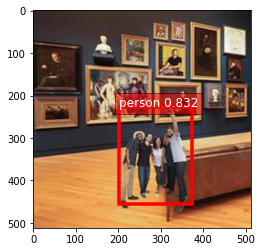

<Figure size 432x288 with 0 Axes>

In [17]:
# run the validation on random image by setting the probability threshold 
img_name = "/content/museum/images_val/bg001_fg015_21.jpeg"; 
visualize = True;
thresh = 0.5;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

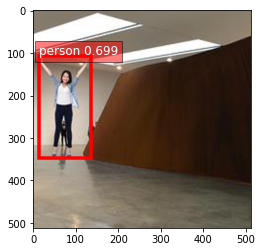

<Figure size 432x288 with 0 Axes>

In [24]:
# run the validation on random image by setting the probability threshold 
img_name = "/content/museum/images_val/bg011_fg046_07.jpeg"; 
visualize = True;
thresh = 0.5;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

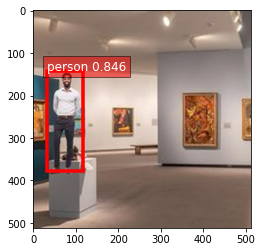

<Figure size 432x288 with 0 Axes>

In [26]:
# run the validation on random image by setting the probability threshold 
img_name = "/content/museum/images_val/bg021_fg049_36.jpeg"; 
visualize = True;
thresh = 0.5;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);